<a href="https://colab.research.google.com/github/AlvarezLI/Python-Prep/blob/main/ProyectoDS_ParteI_Alvarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df = pd.read_csv('inetflix_titles.csv',encoding='latin-1',delimiter = ';', engine='python')



<Figure size 1200x800 with 0 Axes>

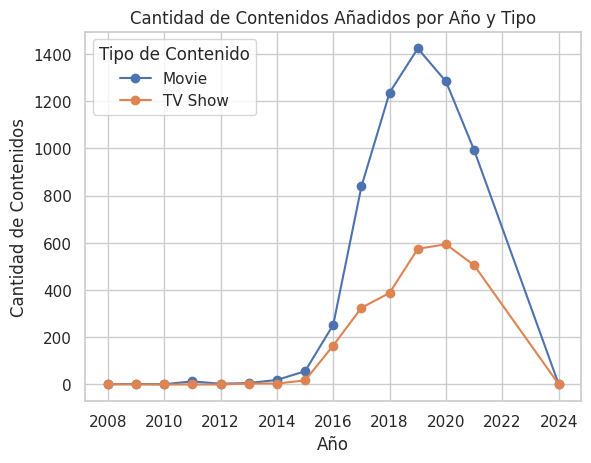

In [3]:


# Make sure you have executed the cell where 'df' is defined before running this cell.
# Convertir 'date_added' a datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Crear columna 'year_added'
df['year_added'] = df['date_added'].dt.year

# Filtrar los datos por tipo de contenido y año
content_by_year = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Crear gráfico de líneas
plt.figure(figsize=(12, 8))
content_by_year.plot(kind='line', marker='o')

plt.title('Cantidad de Contenidos Añadidos por Año y Tipo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Contenidos')
plt.legend(title='Tipo de Contenido')
plt.grid(True)
plt.show()

Distribución de Tipos de Contenidos:

¿Cuál es la proporción de películas y programas de TV en el catálogo de Netflix?

<ipython-input-4-f9b0379c7bcb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')  # Now 'type' should refer to the correct column


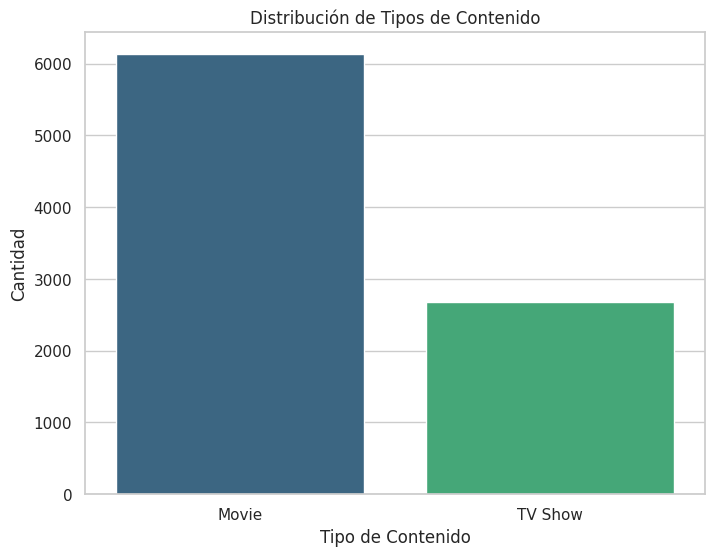

In [4]:
# Visualización de la distribución de tipos de contenido
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type', palette='viridis')  # Now 'type' should refer to the correct column
plt.title('Distribución de Tipos de Contenido')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad')
plt.show()

Relación entre Países y Tipos de Contenidos:

¿Cuáles son los principales países que producen contenido para Netflix?

Duración y Rating de Contenidos:

¿Cuál es la duración promedio de las películas y el número promedio de temporadas de los programas de TV?

Duración promedio de películas: 99.53


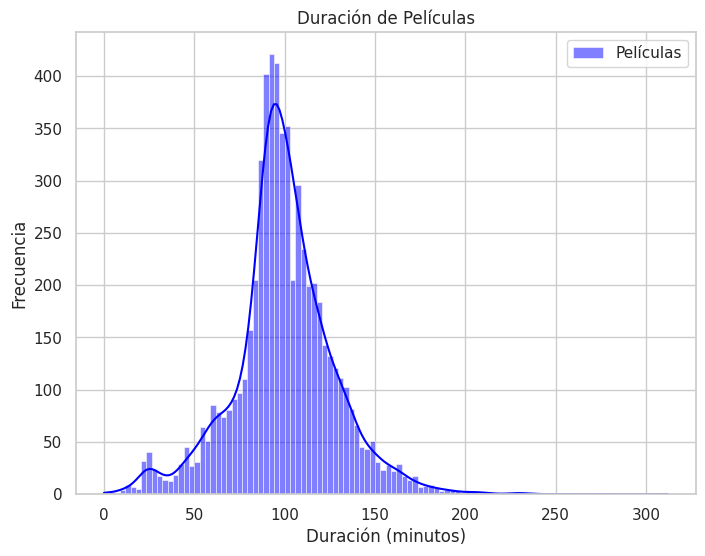

In [5]:
# Convertir la duración en formato numérico exclusivamente en minutos
df['duration_num'] = df['duration'].apply(lambda x: int(str(x).split(' ')[0]) if 'min' in str(x) else 0)

# Filtrar por tipo de contenido
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Resumen numérico con redondeo
print("Duración promedio de películas: {:.2f}".format(movies['duration_num'].mean()))

# Visualización
plt.figure(figsize=(8, 6))
sns.histplot(movies['duration_num'], kde=True, color='blue', label='Películas')
plt.title('Duración de Películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Tendencias de Adición de Contenido:

¿Cómo ha cambiado la cantidad de contenido añadido a Netflix a lo largo de los años?

<ipython-input-12-5193709a41c3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_added', palette='viridis', order=sorted(df['year_added'].dropna().unique()))


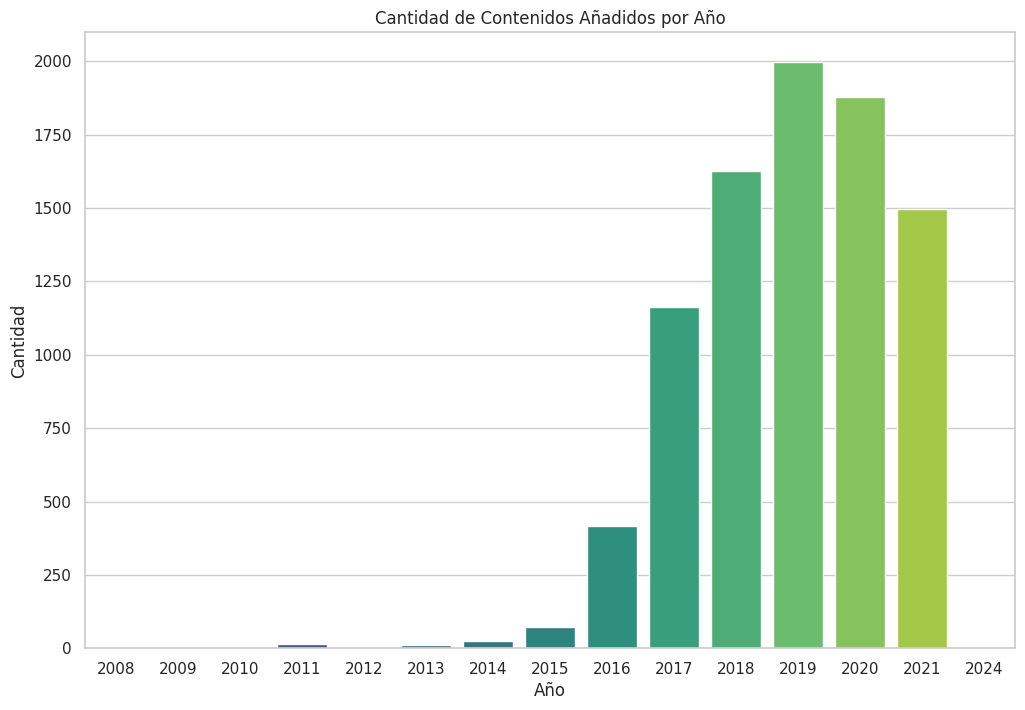

In [ ]:
# Convertir 'date_added' a datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Crear columna 'year_added' y 'month_added'
df['year_added'] = df['date_added'].dt.year.astype('Int64')
df['month_added'] = df['date_added'].dt.to_period('M')

# Visualización de la cantidad de contenido añadido a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='year_added', palette='viridis', order=sorted(df['year_added'].dropna().unique()))
plt.title('Cantidad de Contenidos Añadidos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()



Identificación de Valores Perdidos


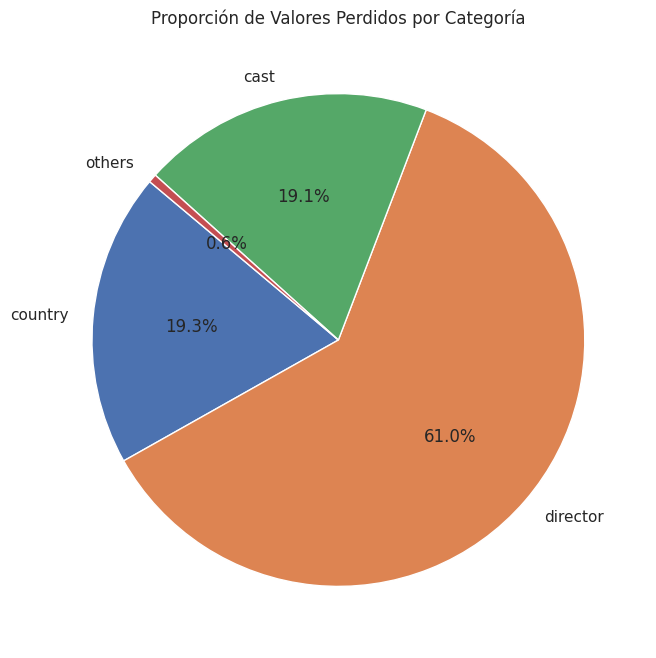

Valores perdidos en cada categoría:
 type               1
title              1
director        2635
cast             826
country          832
date_added        11
release_year       1
rating             5
duration           4
listed_in          1
dtype: int64


In [21]:

# Calcular el número de valores perdidos por columna
missing_values = df.isnull().sum()

# Filtrar columnas con valores perdidos
missing_values = missing_values[missing_values > 0]

# Definir las columnas principales
main_categories = ['country', 'director', 'cast']

# Crear un diccionario para almacenar los valores perdidos por categoría
missing_values_categories = {'country': 0, 'director': 0, 'cast': 0, 'others': 0}

# Iterar sobre las columnas con valores perdidos y asignarlas a la categoría correspondiente
for column in missing_values.index:
    if column in main_categories:
        missing_values_categories[column] += missing_values[column]
    else:
        missing_values_categories['others'] += missing_values[column]

# Crear una lista de nombres de categorías y sus respectivos valores perdidos
categories = list(missing_values_categories.keys())
values = list(missing_values_categories.values())

# Crear un gráfico de torta de valores perdidos
plt.figure(figsize=(10, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Valores Perdidos por Categoría')
plt.show()

# Resumen de valores perdidos
print("Valores perdidos en cada categoría:\n", missing_values)